# Scraping


In [ ]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
pd.set_option('display.max_columns', None)

url = 'https://www.bukitvista.com/bali-vacation-rentals'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

In [ ]:
containers = soup.findAll("div", attrs={"class":"item-body flex-grow-1"})
h = containers[0].text
print(h)



Nusa Dua Luxe Villa w/ Ocean-View & Private Beach



Starting from USD 715 per 2 nights


Beds: 3Baths: 4 



In [ ]:
for container in containers:
  h = container.text
h

'\n\nStunning Ocean View Nusa Dua Villa + Infinity pool\n\n\n\nStart from $13,160 USD per Month\n\n\nBeds: 3Baths: 4 \n'

In [ ]:

extracted_data = []

for container in containers:
  h = container.text
  # Split the text
  lines = [line.strip() for line in h.split('\n') if line.strip()]

  # Append the cleaned lines
  extracted_data.append(lines)

for i, data_item in enumerate(extracted_data[:50]):
    print(f"Container {i+1}:")
    for line in data_item:
        print(line)
    print("-" * 20)

Container 1:
Nusa Dua Luxe Villa w/ Ocean-View & Private Beach
Starting from USD 715 per 2 nights
Beds: 3Baths: 4
--------------------
Container 2:
Dreamy Haven w/ Pool | 300m from Bingin Beach
Starting from USD 430 per 2 nights
Beds: 2Baths: 2
--------------------
Container 3:
Sunny Tropical Luxe Villa in Ungasan with Pool
Starting from USD 172 per night
Beds: 2Baths: 2
--------------------
Container 4:
Sun-Soaked Canggu Villa Perfect for Families
Starting from USD 100 per night
Beds: 2Baths: 2
--------------------
Container 5:
Sun-Soaked 2BR Villa w/ Pool 15-Min Ride to Beach
Starting from USD 91 per night
Beds: 2Baths: 2
--------------------
Container 6:
Voguish Penthouse with Rooftop Pool Near Canggu
Starting from USD 89 per night
Beds: 2Baths: 2
--------------------
Container 7:
Quaint & Homey Balinese Villa w/ Private Pool
Start from $1,780 USD per Month
Beds: 2Baths: 2
--------------------
Container 8:
Tranquil 3BR Villa in Jimbaran with Wi-Fi + Pool
Start from $2,570 USD per Mo

In [ ]:
extracted_data = []
for container in containers:
    h = container.text
    lines = [line.strip() for line in h.split('\n') if line.strip()]
    extracted_data.append(lines)

# Create a list
data_for_df = []

# Iterate through the extracted data
for i, data_item in enumerate(extracted_data):

  container_data = {}
  # Extract relevant information
  for j, line in enumerate(data_item):

      if "IDR" in line or "USD" in line:
          container_data["price"] = line
      elif "Guest" in line :
          container_data["guest"] = line
      elif "Beds" in line:
          container_data["bedroom"] = line
      elif j == 0:
        container_data["title"] = line

  data_for_df.append(container_data)

# Create the DataFrame
df = pd.DataFrame(data_for_df)
df

,title,price,bedroom,guest
0,Nusa Dua Luxe Villa w/ Ocean-View & Private Beach,Starting from USD 715 per 2 nights,Beds: 3Baths: 4,NaN
1,Dreamy Haven w/ Pool | 300m from Bingin Beach,Starting from USD 430 per 2 nights,Beds: 2Baths: 2,NaN
2,Sunny Tropical Luxe Villa in Ungasan with Pool,Starting from USD 172 per night,Beds: 2Baths: 2,NaN
3,Sun-Soaked Canggu Villa Perfect for Families,Starting from USD 100 per night,Beds: 2Baths: 2,NaN
4,Sun-Soaked 2BR Villa w/ Pool 15-Min Ride to Beach,Starting from USD 91 per night,Beds: 2Baths: 2,NaN
5,Voguish Penthouse with Rooftop Pool Near Canggu,Starting from USD 89 per night,Beds: 2Baths: 2,NaN
6,Quaint & Homey Balinese Villa w/ Private Pool,"Start from $1,780 USD per Month",Beds: 2Baths: 2,NaN
7,Tranquil 3BR Villa in Jimbaran with Wi-Fi + Pool,"Start from $2,570 USD per Month",Beds: 3Baths: 3,NaN
8,Family Holiday House w/ Private Pool in Jimbaran,"Start from $3,350 USD per Month",Beds: 5Baths: 5,NaN
9,Ungasan Exquisite Villa w/ Rooftop & Private P...,Starting from USD 167 per night,Beds: 3Baths: 3.5,NaN


In [ ]:
def extract_beds_baths(bedroom_string):
    """
    Extracts the number of beds and baths from a string.
    Handles cases where either beds or baths information might be missing.
    """
    try:
        parts = bedroom_string.split("Baths:")
        beds_str = parts[0].split("Beds:")[1]
        beds = float(beds_str)
    except:
        beds = None

    try:
        if len(parts) > 1: # Check if bath information exists.
          baths_str = parts[1]
          baths = float(baths_str)
        else:
          baths = None
    except:
        baths = None
    return beds, baths


# Apply the function to create new 'beds' and 'baths' columns
df[['beds', 'baths']] = df['bedroom'].apply(extract_beds_baths).tolist()
df = df.drop('guest', axis=1)
df = df.drop('bedroom', axis=1)


In [ ]:
# Create a new column 'hotel_name'
df['hotel_name'] = df['title'].str.split('w/').str[0].str.strip()
df = df.drop('title', axis=1)

In [ ]:
cols = list(df.columns)
cols.insert(0, cols.pop(cols.index('hotel_name')))
df = df[cols]

In [ ]:
df.fillna(0, inplace=True)


In [ ]:
df['beds'] = df['beds'].astype(int)
df['baths'] = df['baths'].astype(int)

In [ ]:
df['price'] = df['price'].str.replace(r'Starting from|Start from|,$|', '', regex=True)
df['price'] = df['price'].str.replace('$', '', regex=False)
df['price'] = df['price'].str.replace(',', '')

In [ ]:
df['price'] = df['price'].str.replace('night', 'Night', regex=False)
df.loc[16, ['hotel_name', 'beds', 'baths']] = ['Sunny Guesthouse', 1, 1]
df.loc[10, ['beds', 'baths']] = [1, 1]
df.loc[13, ['beds', 'baths']] = [1, 1]
df.loc[17, ['beds', 'baths']] = [1, 1]
df

,hotel_name,price,beds,baths
0,Nusa Dua Luxe Villa,USD 715 per 2 Nights,3,4
1,Dreamy Haven,USD 430 per 2 Nights,2,2
2,Sunny Tropical Luxe Villa in Ungasan with Pool,USD 172 per Night,2,2
3,Sun-Soaked Canggu Villa Perfect for Families,USD 100 per Night,2,2
4,Sun-Soaked 2BR Villa,USD 91 per Night,2,2
5,Voguish Penthouse with Rooftop Pool Near Canggu,USD 89 per Night,2,2
6,Quaint & Homey Balinese Villa,1780 USD per Month,2,2
7,Tranquil 3BR Villa in Jimbaran with Wi-Fi + Pool,2570 USD per Month,3,3
8,Family Holiday House,3350 USD per Month,5,5
9,Ungasan Exquisite Villa,USD 167 per Night,3,3


# Preprocessing

In [57]:
import pandas as pd

In [58]:
df = pd.read_excel('bukitvista.xlsx')
df.head(3)

,id,hotel name,price,beds,baths,garage,guest,area,WIFI CONNECTIVITY,ROOFTOP,...,Pharmacy,SCOOTER RENTAL,DAILY CLEANING,AIRPORT PICKUP,CHECK IN,CHECK OUT,pets,PAYMENT METHOD,rating,host
0,PR0873,Uluwatu Modern Boho Villa Near Nyang Nyang Beach,USD 258 per 2 Night,2,2.0,0.0,4.0,NaN,80 Mbps,Rooftop terrace,...,3.6 km or 7 mins ride,between IDR 100K – 200K per day,provide,"Rp. 325,000.",check in by 5 PM,not permitted,NO PETS ALLOWED,"credit card, Jenius by BTPN (Indonesia), Digib...",4.75,Kayla
1,PR0874,Bingin Beach Hideaway: Group Villa with Pool &...,USD 161 per Night,3,3.0,1.0,6.0,Bingin,93 Mbps,NaN,...,8 mins ride or 2.8 km,IDR 100K to IDR 150K per day,"no, request based","no, request based",Standard Check-in: 15:00,Standard Check-out: 11:00,NO PETS ALLOWED,"credit card, Jenius by BTPN (Indonesia), Digib...",5.0,Wayana
2,PR0960,4-Bedroom Mediterranean Luxury Villa with Ubud...,USD 202 per Night,4,4.0,1.0,8.0,Ubud,95 Mbps,Rooftop terrace,...,10 minutes ride or 3.1 km,IDR 100K – 200K per day,provide,"Rp. 500,000 per trip",check in by 5 PM,checkout time at 11 AM,NaN,"credit card, Jenius by BTPN (Indonesia), Digib...",4.59,Ghani


In [59]:
# semua kolom menjadi huruf besar

df.columns = df.columns.str.upper()

In [60]:
# hapus duplicate
df = df.drop_duplicates(subset=['ID'])

In [61]:
# isi nan pada kolom garage dengan nilai 0
df['GARAGE'].fillna(0, inplace=True)

<ipython-input-61-66ef7af40da3>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['GARAGE'].fillna(0, inplace=True)


In [62]:
# isi nilai nan di kolom area
df['AREA'] = df['AREA'].fillna('Bali')

In [63]:
# isi nilai nan pada rooftop
df['ROOFTOP'] = df['ROOFTOP'].fillna('No')

In [64]:
# Isi kolom ROOFTOP dengan nilai 'Yes' selain 'No'
df.loc[df['ROOFTOP'] != 'No', 'ROOFTOP'] = 'Yes'

In [65]:
# Isi nilai nan pada kolom RESTAURANT dengan nilai 'Tidak Diketahui'
df['RESTAURANT'].fillna('Unknown', inplace=True)

<ipython-input-65-ff4e61ac623b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RESTAURANT'].fillna('Unknown', inplace=True)


In [66]:
# Isi nilai nan pada kolom LAUNDRY dengan nilai 'Tidak Diketahui'
df['RESTAURANT'].fillna('Unknown', inplace=True)

In [67]:
# Isi nilai nan pada kolom LAUNDRY dengan nilai 'Tidak Diketahui'
df['LAUNDRY'].fillna('Unknown', inplace=True)

<ipython-input-67-ea6893c49807>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LAUNDRY'].fillna('Unknown', inplace=True)


In [68]:
# Isi nilai nan pada kolom PHARMACY dengan nilai 'Tidak Diketahui'
df['PHARMACY'].fillna('Unknown', inplace=True)

<ipython-input-68-6932ae2d5cf3>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PHARMACY'].fillna('Unknown', inplace=True)


In [69]:
# Isi nilai nan pada kolom ATMS dengan nilai 'Tidak Diketahui'
df['ATMS'].fillna('Unknown', inplace=True)

<ipython-input-69-736526177016>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ATMS'].fillna('Unknown', inplace=True)


In [70]:
# Isi nilai nan pada kolom BEACH dengan nilai 'Tidak Diketahui'
df['BEACH'].fillna('Unknown', inplace=True)

<ipython-input-70-ffde379ff220>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['BEACH'].fillna('Unknown', inplace=True)


In [71]:
# Isi nilai nan pada kolom DAILY CLEANING dengan nilai 'no, request based'
df['DAILY CLEANING'].fillna('no, request based', inplace=True)

<ipython-input-71-13a24bf94d4f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['DAILY CLEANING'].fillna('no, request based', inplace=True)


In [72]:
# Isi nilai nan pada kolom AIRPORT PICKUP dengan nilai 'no, request based'
df['AIRPORT PICKUP'].fillna('no, request based', inplace=True)

<ipython-input-72-59893549a58a>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['AIRPORT PICKUP'].fillna('no, request based', inplace=True)


In [73]:
# Isi nilai nan pada kolom PETS dengan nilai 'PET ALLOWED'
df['PETS'].fillna('PET ALLOWED', inplace=True)

<ipython-input-73-94991d1a1176>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PETS'].fillna('PET ALLOWED', inplace=True)


In [74]:
# Isi nilai nan pada kolom RATING dengan nilai 'Tidak Diketahui'
df['RATING'].fillna('Unknown', inplace=True)

<ipython-input-74-7f23647b4213>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RATING'].fillna('Unknown', inplace=True)


In [75]:
# Isi nilai nan pada kolom HOST dengan nilai 'Tidak Diketahui'
df['HOST'].fillna('Unknown', inplace=True)

<ipython-input-75-f23202e97637>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['HOST'].fillna('Unknown', inplace=True)


In [76]:
df

,ID,HOTEL NAME,PRICE,BEDS,BATHS,GARAGE,GUEST,AREA,WIFI CONNECTIVITY,ROOFTOP,...,PHARMACY,SCOOTER RENTAL,DAILY CLEANING,AIRPORT PICKUP,CHECK IN,CHECK OUT,PETS,PAYMENT METHOD,RATING,HOST
0,PR0873,Uluwatu Modern Boho Villa Near Nyang Nyang Beach,USD 258 per 2 Night,2,2.0,0.0,4.0,Bali,80 Mbps,Yes,...,3.6 km or 7 mins ride,between IDR 100K – 200K per day,provide,"Rp. 325,000.",check in by 5 PM,not permitted,NO PETS ALLOWED,"credit card, Jenius by BTPN (Indonesia), Digib...",4.75,Kayla
1,PR0874,Bingin Beach Hideaway: Group Villa with Pool &...,USD 161 per Night,3,3.0,1.0,6.0,Bingin,93 Mbps,No,...,8 mins ride or 2.8 km,IDR 100K to IDR 150K per day,"no, request based","no, request based",Standard Check-in: 15:00,Standard Check-out: 11:00,NO PETS ALLOWED,"credit card, Jenius by BTPN (Indonesia), Digib...",5.0,Wayana
2,PR0960,4-Bedroom Mediterranean Luxury Villa with Ubud...,USD 202 per Night,4,4.0,1.0,8.0,Ubud,95 Mbps,Yes,...,10 minutes ride or 3.1 km,IDR 100K – 200K per day,provide,"Rp. 500,000 per trip",check in by 5 PM,checkout time at 11 AM,PET ALLOWED,"credit card, Jenius by BTPN (Indonesia), Digib...",4.59,Ghani
3,PR0242,Luxurious 3-Bedroom Nusa Dua Seafront Villa,USD 715 per 2 Night,3,4.0,0.0,6.0,Nusadua,46 Mbps,No,...,"4.7 km, 12 minutes ride",team can help you with scooter rental,provide,IDR 325K – IDR 500K,Check-in: 14:00,Check-out: 11:00,PET ALLOWED,"credit card, Jenius by BTPN (Indonesia), Digib...",4.84,Jing Wayana
4,PR0925,Surfer’s Villa 4 Mins to Bingin & Dreamland,USD 118 per Night,2,2.5,0.0,4.0,Pecatu,available,No,...,2.9 km or 8 min,IDR 100K – 150K per day,"no, request based",IDR 325K,checking in by 5 PM,11:00:00,NO PETS ALLOWED,"credit card, Jenius by BTPN (Indonesia), Digib...",4.73,Wayana Jing
5,PR0857,Grand Villa Retreat w/ Pool & Garden,USD 84 per Night,2,2.0,0.0,4.0,Balangan,available,No,...,3 mins ride or 1.2 km,IDR 100K – 200K per day,"no, request based",,check in by 5 PM,checkout time at 11 AM,NO PETS ALLOWED,"credit card, Jenius by BTPN (Indonesia), Digib...",4.79,Ketut
6,PR0926,Private Pool Villa Minutes from Bingin Surf Ha...,USD 165 per Night,2,2.0,0.0,4.0,Pecatu,available,No,...,Unknown,IDR 100K – 150K per day,"no, request based",IDR 325K,checking in by 5 PM,STRICTLY 11 AM,NO PETS ALLOWED,"credit card, Jenius by BTPN (Indonesia), Digib...",4.73,Wayana Jing
7,PR0922,Sun-Soaked Canggu Villa Perfect for Families,USD 100 per Night,2,2.0,0.0,4.0,Canggu,120 Mbps,No,...,2 min ride (850 m),IDR 100K – 200K per day,provide,"Rp. 325,000",by 5 PM,11 AM,PET ALLOWED,"credit card, Jenius by BTPN (Indonesia), Digib...",4.0,Ketut
8,PR0512,Ubud’s Verdant Hideaway w/ Pool & Garden Views,USD 34 per Night,1,1.0,0.0,2.0,Ubud,We don’t have reliable WiFi,No,...,Unknown,IDR 100K – 150K per day,"no, request based","no, request based",check in by 5 PM,checkout time at 11 AM,NO PETS ALLOWED,"credit card, Jenius by BTPN (Indonesia), Digib...",Unknown,Unknown
9,PR0803,Dazzling Villa with Pool and Rooftop in Bingin,USD 202 per Night,2,2.0,0.0,4.0,Bingin,89 Mbps,Yes,...,Unknown,IDR 100K – 150K per day,"no, request based",IDR 325K,Check-in: 14:00,Check-out: 12:00,NO PETS ALLOWED,"credit card, Jenius by BTPN (Indonesia), Digib...",4.82,Wayana Jing


In [77]:
print(df.isnull().sum())

ID                   0
HOTEL NAME           0
PRICE                0
BEDS                 0
BATHS                0
GARAGE               0
GUEST                0
AREA                 0
WIFI CONNECTIVITY    0
ROOFTOP              0
KITCHEN              0
POOL                 0
RESTAURANT           0
LAUNDRY              0
ATMS                 0
BEACH                0
PHARMACY             0
SCOOTER RENTAL       0
DAILY CLEANING       0
AIRPORT PICKUP       0
CHECK IN             0
CHECK OUT            0
PETS                 0
PAYMENT METHOD       0
RATING               0
HOST                 0
dtype: int64


In [78]:
df.describe()

,BEDS,BATHS,GARAGE,GUEST
count,21.000000,21.000000,21.000000,21.000000
mean,2.285714,2.357143,0.095238,4.571429
std,1.007118,1.062342,0.300793,2.014235
min,1.000000,1.000000,0.000000,2.000000
25%,2.000000,2.000000,0.000000,4.000000
50%,2.000000,2.000000,0.000000,4.000000
75%,3.000000,3.000000,0.000000,6.000000
max,5.000000,5.000000,1.000000,10.000000


# EDA

            BEDS      BATHS     GARAGE      GUEST
count  21.000000  21.000000  21.000000  21.000000
mean    2.285714   2.357143   0.095238   4.571429
std     1.007118   1.062342   0.300793   2.014235
min     1.000000   1.000000   0.000000   2.000000
25%     2.000000   2.000000   0.000000   4.000000
50%     2.000000   2.000000   0.000000   4.000000
75%     3.000000   3.000000   0.000000   6.000000
max     5.000000   5.000000   1.000000  10.000000
<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, 0 to 25
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 21 non-null     object 
 1   HOTEL NAME         21 non-null     object 
 2   PRICE              21 non-null     object 
 3   BEDS               21 non-null     int64  
 4   BATHS              21 non-null     float64
 5   GARAGE             21 non-null     float64
 6   GUEST              21 non-null     float64
 7   AREA           

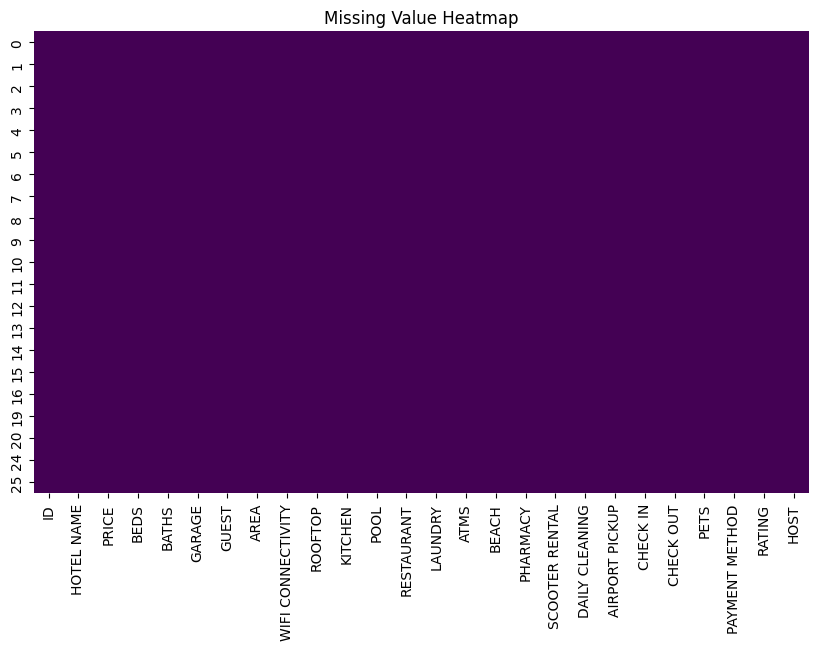

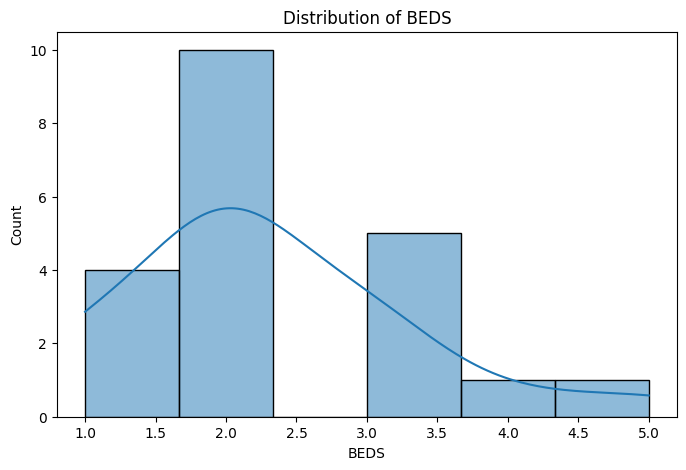

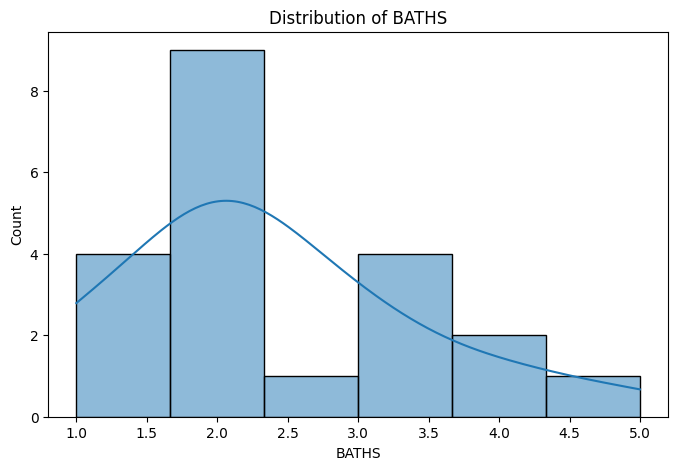

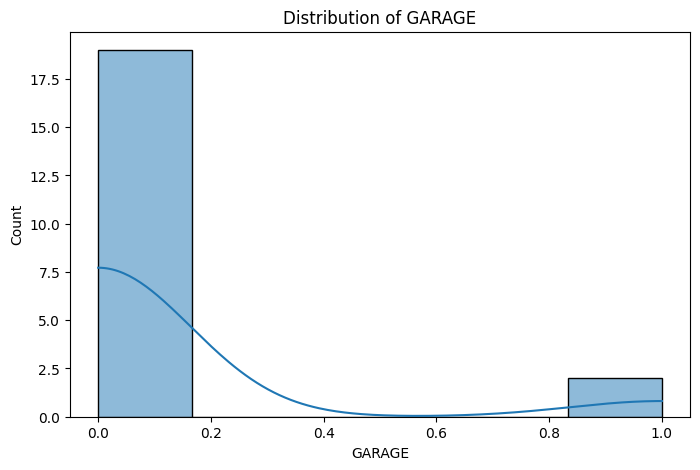

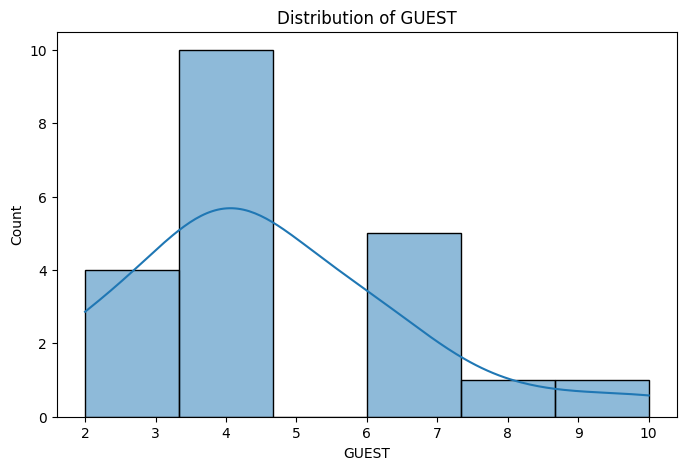

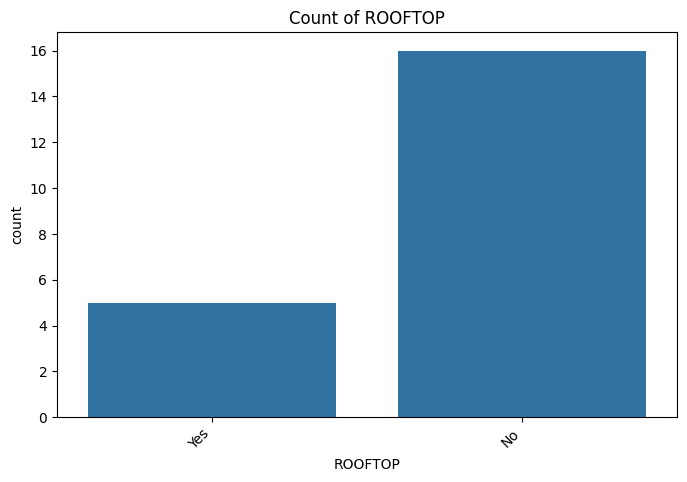

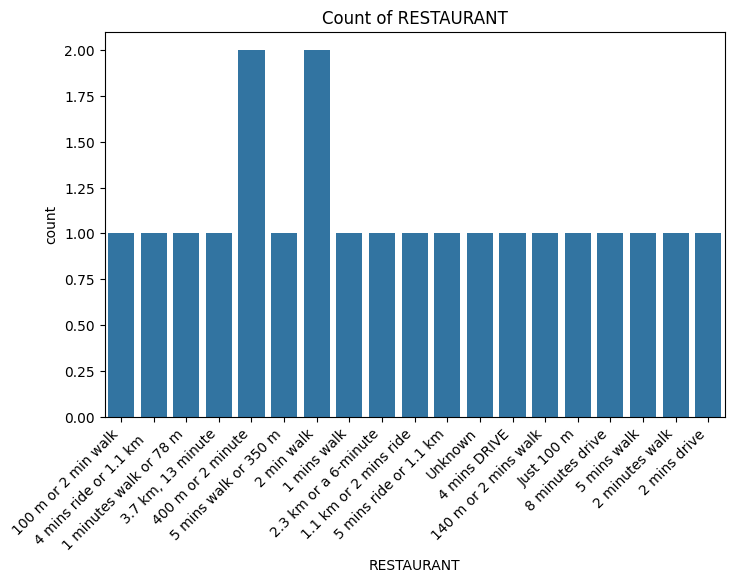

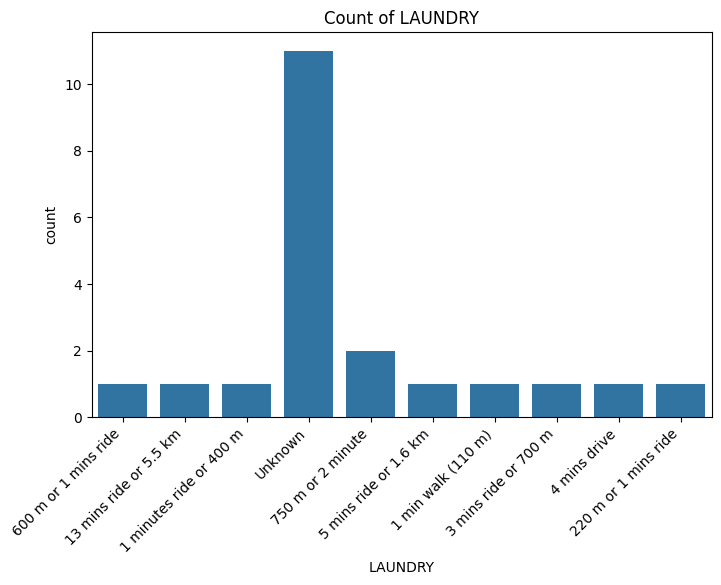

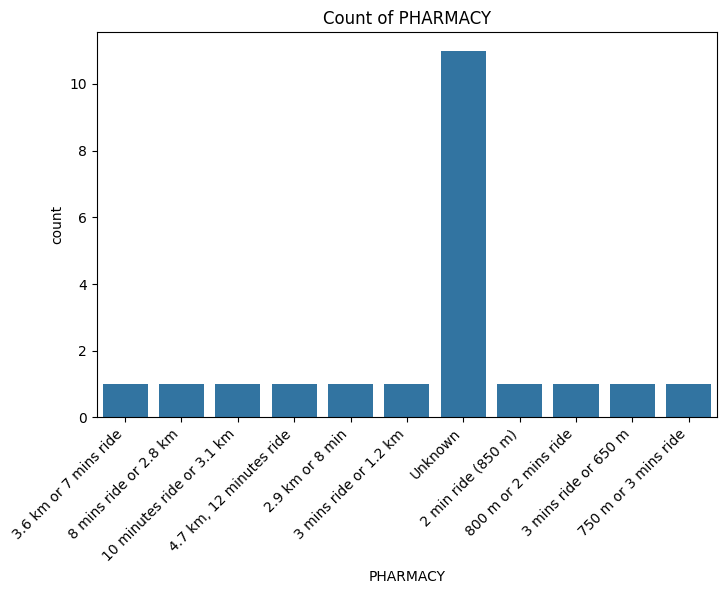

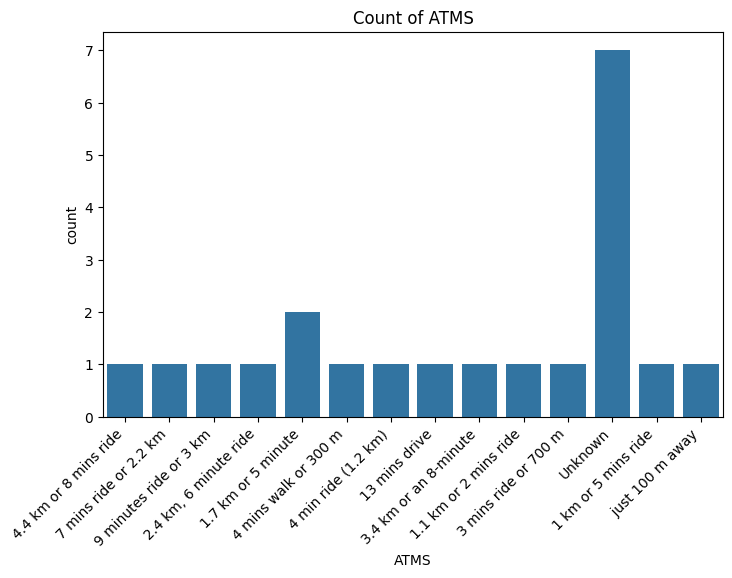

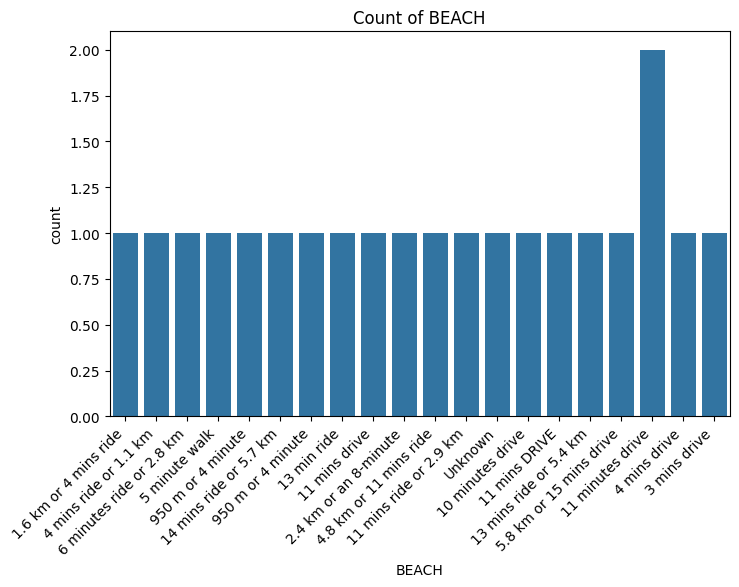

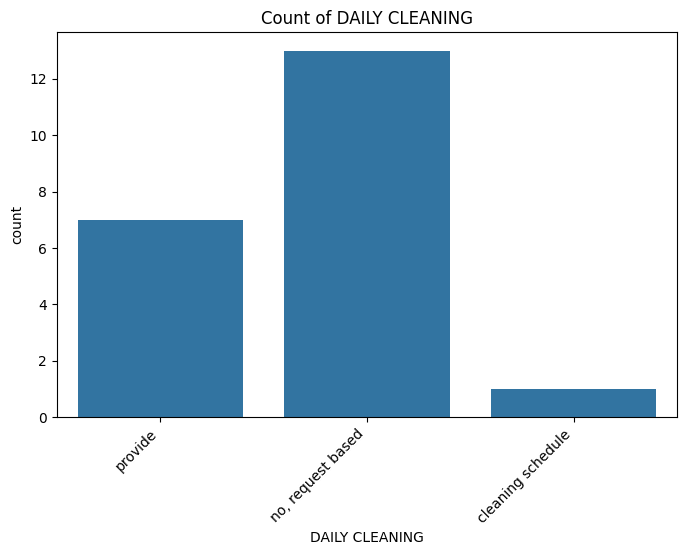

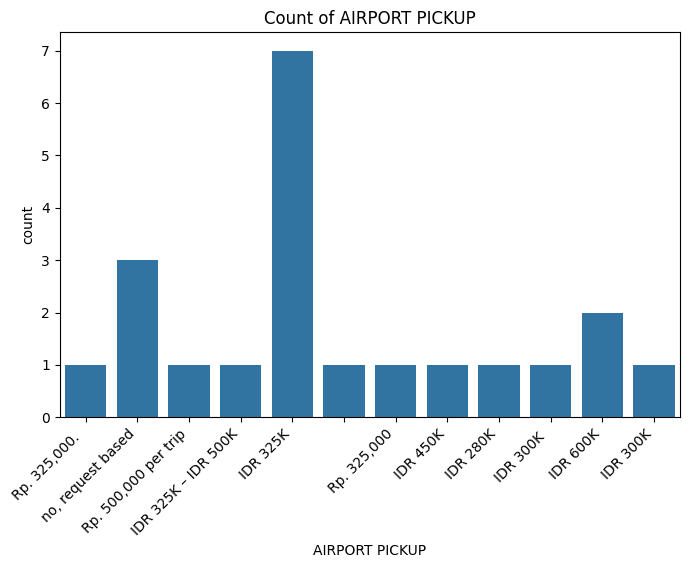

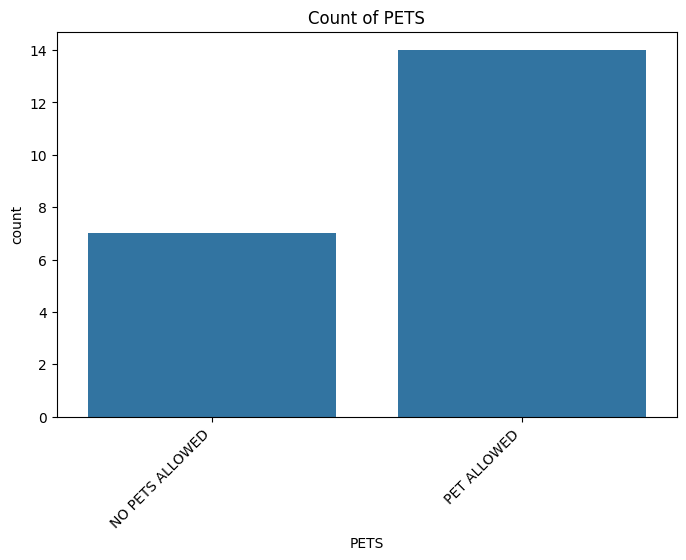

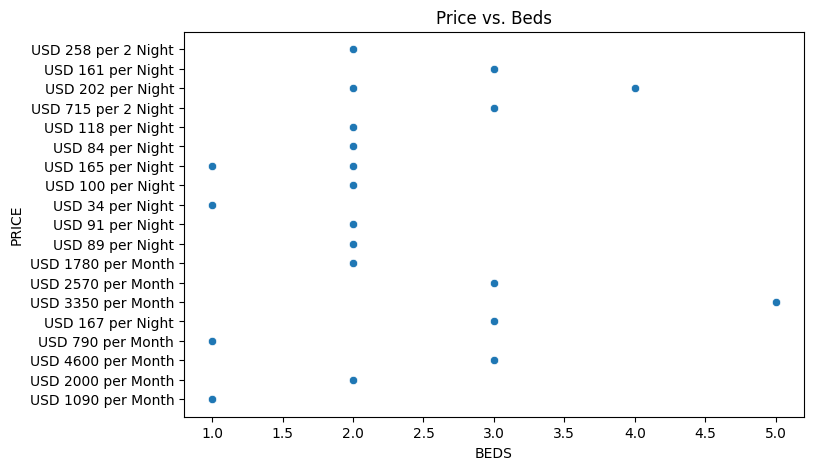

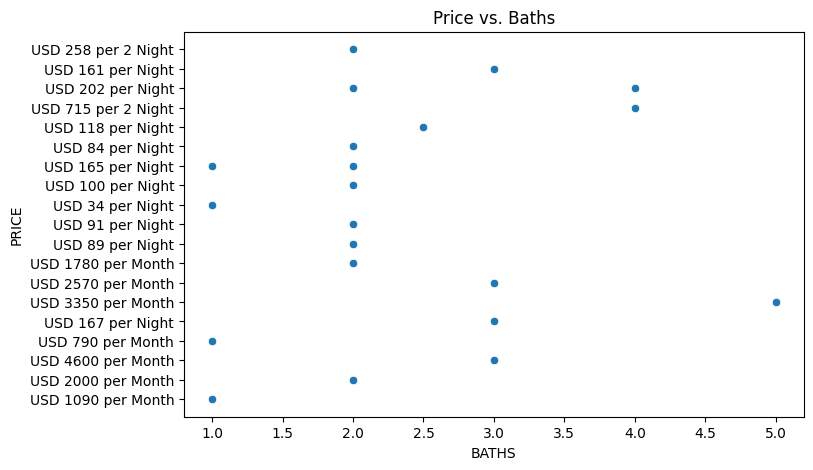

ValueError: could not convert string to float: 'PR0873'

In [56]:
# prompt: buatka eda dari data diatas

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame from the provided code

# 1. Descriptive Statistics
print(df.describe())

# 2. Data Type Information
print(df.info())

# 3. Missing Value Analysis
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Value Heatmap')
plt.show()

# 4. Distribution of Numerical Variables
numerical_cols = df.select_dtypes(include=['number']).columns
for col in numerical_cols:
  plt.figure(figsize=(8, 5))
  sns.histplot(df[col], kde=True)
  plt.title(f'Distribution of {col}')
  plt.show()

# 5. Categorical Variable Analysis (e.g., rooftop, restaurant, laundry)
categorical_cols = ['ROOFTOP', 'RESTAURANT', 'LAUNDRY', 'PHARMACY', 'ATMS', 'BEACH', 'DAILY CLEANING', 'AIRPORT PICKUP', 'PETS']
for col in categorical_cols:
  plt.figure(figsize=(8, 5))
  sns.countplot(x=col, data=df)
  plt.title(f'Count of {col}')
  plt.xticks(rotation=45, ha='right')
  plt.show()

# 6. Relationship between Variables (e.g., price vs. beds, price vs. baths)
plt.figure(figsize=(8, 5))
sns.scatterplot(x='BEDS', y='PRICE', data=df)
plt.title('Price vs. Beds')
plt.show()

plt.figure(figsize=(8, 5))
sns.scatterplot(x='BATHS', y='PRICE', data=df)
plt.title('Price vs. Baths')
plt.show()

# 7. Correlation Matrix (for numerical variables)
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# 8. Box Plots (e.g., price distribution by area, beds distribution by rooftop)
plt.figure(figsize=(8, 5))
sns.boxplot(x='AREA', y='PRICE', data=df)
plt.title('Price Distribution by Area')
plt.xticks(rotation=45, ha='right')
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x='ROOFTOP', y='BEDS', data=df)
plt.title('Beds Distribution by Rooftop')
plt.show()

# 9. Pair Plot (for a subset of variables)
sns.pairplot(df[['PRICE', 'BEDS', 'BATHS']], diag_kind='kde')
plt.show()

# You can further customize these plots and explore more relationships within your data based on your specific research questions.
